# Importar Bibliotecas

In [3]:
import pycaret.classification as pc

In [2]:
import pandas as pd

# Importando os Dados

Os dados de treino são separados em dois arquivos csv. O primeiro tem as características de cada pessoa que respondeu a pesquisa. O segundo arquivo tem se ele tomou a vacina para H1N1 e gripe.

In [10]:
X = pd.read_csv("Dados/training_set_features.csv")
X.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [13]:
y = pd.read_csv("Dados/training_set_labels.csv")
y.columns

Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], dtype='object')

Vamos fazer um merge entre as duas tabelas utilizando o respondent_id.

In [14]:
df = X.merge(y, on = "respondent_id")
df.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [16]:
X.shape

(26707, 36)

In [17]:
y.shape

(26707, 3)

In [18]:
df.shape

(26707, 38)

Note que os 3 dataframes estão com o mesmo número de linhas, então está tudo certo para começar.

# Baseline

Para criar o nosso baseline não vamos criar features novas, não faremos seleção de features, não iremos fazer otimização de hiperparametros. Esse baseline é apenas treinar um modelo com os dados as is no pycaret com alguns pequenos preprocessamentos.

Todas essas próximas fases serão feitas nas próximas etapas de exploração da competição.

## Baseline - H1N1

In [20]:
pc.setup(data = df,
         target = 'h1n1_vaccine',
         ignore_features = ['respondent_id','seasonal_vaccine'],
         train_size = 0.7
         )

,Description,Value
0,Session id,7348
1,Target,h1n1_vaccine
2,Target type,Binary
3,Original data shape,"(26707, 36)"
4,Transformed data shape,"(26707, 59)"
5,Transformed train set shape,"(18694, 59)"
6,Transformed test set shape,"(8013, 59)"
7,Ignore features,2
8,Ordinal features,1
9,Numeric features,23


Como o projeto é para prever a probabilidade de tomar a vacina de H1N1 e gripe, faremos um modelo para cada caso, por isso que nesse caso que o target é a vacina de H1N1 eu ignoro a da vacina de gripe.

In [21]:
pc.compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8365,0.8439,0.3311,0.7676,0.4623,0.3834,0.4308,1.7640
lr,Logistic Regression,0.8343,0.8360,0.4222,0.6764,0.5198,0.4261,0.4435,5.6980
lda,Linear Discriminant Analysis,0.8331,0.8327,0.4708,0.6474,0.5450,0.4459,0.4545,0.9320
nb,Naive Bayes,0.7677,0.7748,0.5977,0.4637,0.5221,0.3719,0.3773,0.8650
knn,K Neighbors Classifier,0.8082,0.7317,0.3343,0.5851,0.4254,0.3204,0.3386,1.4020
rf,Random Forest Classifier,0.8009,0.7190,0.0874,0.7849,0.1569,0.1194,0.2170,1.5330
qda,Quadratic Discriminant Analysis,0.6689,0.6675,0.5529,0.3369,0.4159,0.2059,0.2191,0.9600
gbc,Gradient Boosting Classifier,0.7850,0.6287,0.0300,0.5879,0.0546,0.0282,0.0775,2.0790
ada,Ada Boost Classifier,0.7908,0.6199,0.0511,0.7077,0.0927,0.0622,0.1375,1.2360
dt,Decision Tree Classifier,0.7693,0.5143,0.0710,0.3177,0.1141,0.0399,0.0556,0.9280


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=7348, verbose=0, warm_start=False)

Como a métrica da competição é o AUC, ordenamos os modelos pela curva AUC. Note que todos os modelos não tiveram um desempenho bom, isso indica que teremos muito trabalho com limpeza desses dados.

In [22]:
model_h1n1 = pc.create_model(estimator = "et",fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8369,0.8351,0.3317,0.7719,0.4640,0.3853,0.4333
1,0.8369,0.8484,0.3241,0.7818,0.4583,0.3810,0.4324
2,0.8294,0.8447,0.3275,0.7143,0.4491,0.3642,0.4031
3,0.8332,0.8366,0.3023,0.7742,0.4348,0.3583,0.4131
4,0.8395,0.8492,0.3476,0.7709,0.4792,0.3999,0.4444
5,0.8331,0.8310,0.3023,0.7742,0.4348,0.3582,0.4130
6,0.8341,0.8511,0.3224,0.7574,0.4523,0.3727,0.4201
7,0.8416,0.8376,0.3526,0.7821,0.4861,0.4079,0.4533
8,0.8411,0.8442,0.3552,0.7747,0.4870,0.4080,0.4516


In [23]:
pc.predict_model(model_h1n1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8390,0.8427,0.3214,0.8021,0.4589,0.3840,0.4397


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,"census_msa_MSA, Not Principle City",census_msa_Non-MSA,"census_msa_MSA, Principle City",household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,Label,Score
18694,3.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.205490,0.206324,0,0,0.81
18695,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.205490,0.206324,1,1,0.55
18696,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,2.0,0.0,0.205490,0.206324,0,0,0.87
18697,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,2.0,0.0,0.171192,0.171533,1,1,0.68
18698,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.205490,0.206324,1,0,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,0.0,0.205490,0.206324,0,0,0.95
26703,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.205490,0.206324,1,1,0.55
26704,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,3.0,0.0,0.205490,0.206324,0,0,0.71
26705,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.205490,0.206324,0,0,0.79


In [24]:
model_h1n1 = pc.finalize_model(model_h1n1)

No treino novamente ele ficou com um AUC na casa dos 80 e nos dados de teste também. Esse será nosso modelo para fazer as predições em baseline.

## Baseline - Gripe

In [25]:
pc.setup(data = df,
         target = 'seasonal_vaccine',
         ignore_features = ['respondent_id','h1n1_vaccine'],
         train_size = 0.7
         )

,Description,Value
0,Session id,998
1,Target,seasonal_vaccine
2,Target type,Binary
3,Original data shape,"(26707, 36)"
4,Transformed data shape,"(26707, 59)"
5,Transformed train set shape,"(18694, 59)"
6,Transformed test set shape,"(8013, 59)"
7,Ignore features,2
8,Ordinal features,1
9,Numeric features,23


In [26]:
pc.compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7763,0.8515,0.7420,0.7695,0.7553,0.5494,0.5499,5.0060
lda,Linear Discriminant Analysis,0.7751,0.8509,0.7353,0.7712,0.7527,0.5467,0.5474,0.9140
et,Extra Trees Classifier,0.7690,0.8403,0.7324,0.7625,0.7470,0.5347,0.5352,1.8390
nb,Naive Bayes,0.7151,0.7866,0.7501,0.6745,0.7103,0.4316,0.4340,0.8930
knn,K Neighbors Classifier,0.7264,0.7802,0.6909,0.7128,0.7016,0.4492,0.4495,1.2660
qda,Quadratic Discriminant Analysis,0.6517,0.7014,0.6384,0.6275,0.6274,0.3010,0.3053,0.9670
rf,Random Forest Classifier,0.6307,0.7007,0.8380,0.5704,0.6788,0.2797,0.3094,1.4280
gbc,Gradient Boosting Classifier,0.5915,0.6834,0.7297,0.5458,0.6241,0.1964,0.2072,1.9980
ada,Ada Boost Classifier,0.5902,0.6296,0.5662,0.5598,0.5620,0.1772,0.1777,1.3260
dt,Decision Tree Classifier,0.5744,0.5859,0.7532,0.5304,0.6222,0.1673,0.1815,0.9110


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=998, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Um ponto curioso é que os modelos tiveram um desempenho bem melhor tentando prever Gripe que tentando prever H1N1.E o fato do melhor modelo ser uma regressão logistíca me deixa curioso, pois modelos lineares são muito sensíveis a outliers e problemas de escalonamento.

In [27]:
model_gripe = pc.create_model(estimator = "lr",fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7770,0.8528,0.7497,0.7664,0.7580,0.5513,0.5514
1,0.7695,0.8513,0.7256,0.7670,0.7457,0.5353,0.5359
2,0.7786,0.8529,0.7532,0.7673,0.7601,0.5546,0.5547
3,0.7545,0.8298,0.7187,0.7452,0.7317,0.5057,0.5059
4,0.7785,0.8536,0.7161,0.7886,0.7506,0.5522,0.5543
5,0.7860,0.8595,0.7552,0.7784,0.7666,0.5691,0.5693
6,0.7753,0.8502,0.7356,0.7711,0.7529,0.5471,0.5476
7,0.7876,0.8551,0.7701,0.7728,0.7714,0.5730,0.5730
8,0.7731,0.8494,0.7310,0.7700,0.7500,0.5426,0.5432


In [28]:
pc.predict_model(model_gripe)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7799,0.8500,0.7357,0.7792,0.7568,0.5560,0.5568


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,census_msa_Non-MSA,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",household_adults,household_children,employment_industry,employment_occupation,seasonal_vaccine,Label,Score
18694,2.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.443366,0.469799,0,1,0.9005
18695,1.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,2.0,0.230137,0.337802,1,0,0.5322
18696,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.510697,0.510748,1,1,0.8021
18697,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.510697,0.510748,1,1,0.9513
18698,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.443366,0.412056,1,0,0.7374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.510697,0.510748,1,1,0.9172
26703,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,2.0,0.0,0.364384,0.688235,0,0,0.8198
26704,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.510697,0.510748,1,1,0.7669
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.325069,0.412056,0,0,0.7634


In [29]:
model_gripe = pc.finalize_model(model_gripe)

# Baseline - Gerando Previsões

Temos dois modelos, agora o que precisamos fazer é gerar o arquivo de submissão e ver como ficamos no leadboarder.

In [72]:
submission_exemple = pd.read_csv('Dados/submission_format.csv')
submission_exemple.head(5)

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.5,0.7
1,26708,0.5,0.7
2,26709,0.5,0.7
3,26710,0.5,0.7
4,26711,0.5,0.7


Basicamente é dizer a probabilidade do respondente tomar a vacina de H1N1 e de gripe. Vamos testar os nossos modelos baseline.

In [73]:
unseen_x = pd.read_csv('Dados/test_set_features.csv')

In [92]:
unseen_x.head(5)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [74]:
unseen_x.shape

(26708, 36)

Trouxemos os dados para fazer o predict, nos próximos passos iremos fazer as previsões e criar um dataframe de submissão.

In [76]:
h1n1_predict = pc.predict_model(model_h1n1, data = unseen_x, raw_score = False)
h1n1_predict['h1n1_vaccine'] = h1n1_predict.apply(lambda x: x['Score'] if x['Label'] == 1 else 1 - x['Score'] , axis=1)

In [77]:
h1n1_predict

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,"census_msa_MSA, Not Principle City",census_msa_Non-MSA,"census_msa_MSA, Principle City",household_adults,household_children,employment_industry,employment_occupation,Label,Score,h1n1_vaccine
0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.133909,0.160574,0,0.91,0.09
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,3.0,0.0,0.133909,0.142268,0,0.98,0.02
2,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.171329,0.142857,0,0.62,0.38
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.207877,0.208909,1,0.51,0.51
4,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.397893,0.176938,0,0.65,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.207877,0.208909,0,0.71,0.29
26704,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,3.0,0.397893,0.189266,0,0.79,0.21
26705,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.207877,0.208909,0,0.83,0.17
26706,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.207877,0.208909,0,0.90,0.10


In [79]:
gripe_predict = pc.predict_model(model_gripe, data = unseen_x, raw_score = False)
gripe_predict['seasonal_vaccine'] = gripe_predict.apply(lambda x: x['Score'] if x['Label'] == 1 else 1 - x['Score'] , axis=1)

In [80]:
gripe_predict

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,census_msa_Non-MSA,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",household_adults,household_children,employment_industry,employment_occupation,Label,Score,seasonal_vaccine
0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.374730,0.428198,0,0.7373,0.2627
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,3.0,0.0,0.374730,0.329897,0,0.9666,0.0334
2,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.307692,0.285714,1,0.5775,0.5775
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.508102,0.508389,1,0.8795,0.8795
4,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.638169,0.436050,1,0.5016,0.5016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.508102,0.508389,0,0.5322,0.4678
26704,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,3.0,0.638169,0.358757,0,0.7889,0.2111
26705,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.508102,0.508389,0,0.7822,0.2178
26706,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.508102,0.508389,0,0.6459,0.3541


In [89]:
dict_submissao = {
    "respondent_id":list(unseen_x['respondent_id']),
    "h1n1_vaccine":list(h1n1_predict['h1n1_vaccine']),
    "seasonal_vaccine":list(gripe_predict['seasonal_vaccine'])
}
submissao = pd.DataFrame().from_dict(dict_submissao)

In [90]:
submissao

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.09,0.2627
1,26708,0.02,0.0334
2,26709,0.38,0.5775
3,26710,0.51,0.8795
4,26711,0.35,0.5016
...,...,...,...
26703,53410,0.29,0.4678
26704,53411,0.21,0.2111
26705,53412,0.17,0.2178
26706,53413,0.10,0.3541


In [91]:
submissao.to_csv("submissao/baseline.csv",index=False)

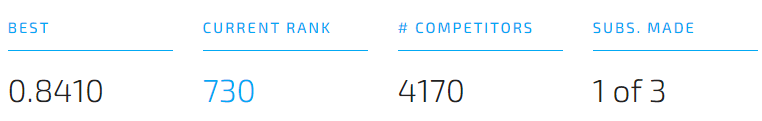

Com essa submissão extremamente simples já consegui ficar dentro dos mil melhores resultados. Conseguimos um auc de 0.84, o melhor no ranking conseguiu um auc de 0.8658.